# Análise estatística de dados fluviométricos
## Hidrograma 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter 
import seaborn as sns 

In [2]:
# Importar dados
path = "C:\\ENS\\Hidrologia"
dados = pd.read_excel(path+'\\86480000_Vazoes.xlsx')

# Identificar tipos de dados (Dtype) 
#dados.info() 

In [3]:
# Extrair dados de 1980 a 2015
dados = dados[dados['Data'] >= '1980-01-01']
dados = dados[dados['Data'] <= '2015-12-01']
dados = dados.reset_index()
dados = dados.drop('index', axis='columns') 

In [4]:
# Verificar se todos os dados são consistidos
print('O primeiro dado é consistido?', dados['NivelConsistencia'][0] == 2)
print('Todos os dados têm o mesmo nível de consistência?', 
      dados['NivelConsistencia'].nunique() == 1) 
dados = dados.drop('NivelConsistencia', axis='columns') 

# Verificar se os dados contêm todos os meses de 1980 a 2015
datas = pd.date_range(start='1980-01-01', end='2015-12-31', freq='ME')
print('Contêm todos os meses?', 
      len(datas) == len(dados.index))

O primeiro dado é consistido? True
Todos os dados têm o mesmo nível de consistência? True
Contêm todos os meses? True


In [5]:
# Reorganizar os dados
dados = dados[::-1]
dados = dados.set_index('Data')
dados.columns = list(range(1, 32))
#dados.head()

In [6]:
# Reorganizar as vazões diárias
ano_mes = lambda x: x.strftime('%Y-%m')
add_zero = lambda x: f'{0}{x}' if x<10 else x

datas = pd.date_range(start='1980-01-01', end='2015-12-31', freq='D')
aux = pd.DataFrame()
aux['Data'] = [data.strftime('%Y-%m-%d') for data in datas]
aux['Vazão'] = [0.0]*len(aux['Data'])
linha = 0
for i in range(len(dados.index)):
    for j in range(len(dados.columns)):
        dia = str(ano_mes(dados.index[i]))+'-'+str(add_zero(dados.columns[j]))
        if dia == aux.loc[linha, 'Data']:
            aux.loc[linha, 'Vazão'] = dados.iloc[i, j]
        else:
            continue
        linha = linha+1
aux.replace(0.0, 'NaN', inplace=True) 
aux['Data'] = pd.to_datetime(aux['Data'], format='%Y-%m-%d')
aux = aux.set_index('Data')
aux['log(Vazão)'] = np.log10(aux['Vazão'])
aux.head() 

,Vazão,log(Vazão)
Data,,
1980-01-01,14.9940,1.175918
1980-01-02,13.8888,1.142665
1980-01-03,12.8170,1.107786
1980-01-04,11.2734,1.052055
1980-01-05,9.8087,0.991611


In [7]:
'''
# Hidrograma diário
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(aux['log(Vazão)'])
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.xlabel('Tempo', fontsize=16)
plt.ylabel('Log(vazão)', fontsize=16)
plt.style.use('seaborn-v0_8-colorblind') 
plt.savefig(path+'\\hidrograma_diario.png', bbox_inches='tight')

# Hidrograma mensal 
media_mensal = aux.resample('ME').mean()
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(media_mensal['log(Vazão)'])
ax.axhline(y=media_mensal['log(Vazão)'].mean(),
           linestyle='--', 
           linewidth=2,
           color='red',
           label='Média')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.xlabel('Tempo', fontsize=16)
plt.ylabel('Log(vazão)', fontsize=16)
plt.legend(fontsize=16)
plt.style.use('seaborn-v0_8-colorblind') 
plt.savefig(path+'\\hidrograma_mensal.png', bbox_inches='tight')
'''

"\n# Hidrograma diário\nfig, ax = plt.subplots(figsize=(10, 4))\nax.plot(aux['log(Vazão)'])\nplt.rcParams['xtick.labelsize'] = 14\nplt.rcParams['ytick.labelsize'] = 14\nplt.xlabel('Tempo', fontsize=16)\nplt.ylabel('Log(vazão)', fontsize=16)\nplt.style.use('seaborn-v0_8-colorblind') \nplt.savefig(path+'\\hidrograma_diario.png', bbox_inches='tight')\n\n# Hidrograma mensal \nmedia_mensal = aux.resample('ME').mean()\nfig, ax = plt.subplots(figsize=(10, 4))\nax.plot(media_mensal['log(Vazão)'])\nax.axhline(y=media_mensal['log(Vazão)'].mean(),\n           linestyle='--', \n           linewidth=2,\n           color='red',\n           label='Média')\nplt.rcParams['xtick.labelsize'] = 14\nplt.rcParams['ytick.labelsize'] = 14\nplt.xlabel('Tempo', fontsize=16)\nplt.ylabel('Log(vazão)', fontsize=16)\nplt.legend(fontsize=16)\nplt.style.use('seaborn-v0_8-colorblind') \nplt.savefig(path+'\\hidrograma_mensal.png', bbox_inches='tight')\n"

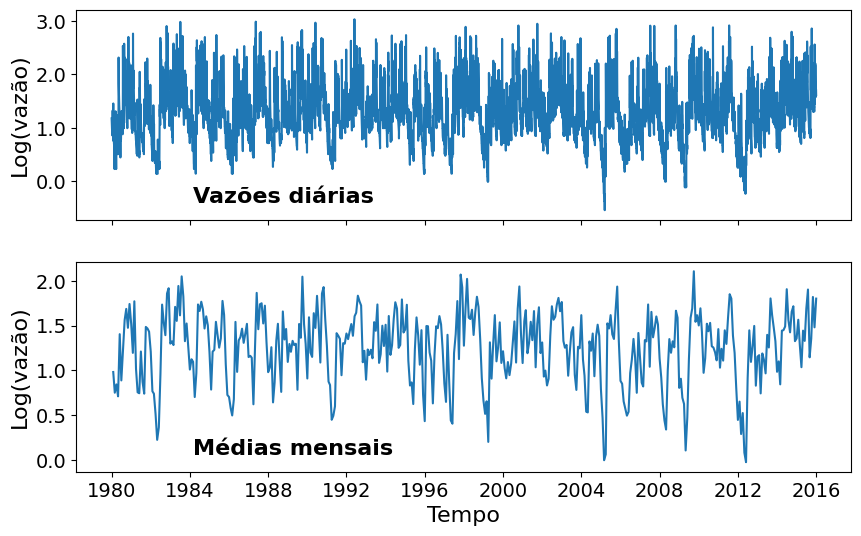

In [9]:
# Hidrogramas
media_mensal = aux.resample('ME').mean()

fig,ax = plt.subplots(2, sharex=True, figsize=(10, 6))
ax[0].plot(aux['log(Vazão)'])
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f')) 
ax[0].set_ylabel('Log(vazão)', fontsize=16)

ax[1].plot(media_mensal['log(Vazão)'])
ax[1].set_ylabel('Log(vazão)', fontsize=16)

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.xlabel('Tempo', fontsize=16) 
font = {'fontsize':16, 'fontweight':'bold'}
plt.text(0.15, 1.28,'Vazões diárias', font, transform=plt.gca().transAxes)
plt.text(0.15, 0.08,'Médias mensais', font, transform=plt.gca().transAxes)
plt.savefig(path+'\\hidrogramas.png', bbox_inches='tight')

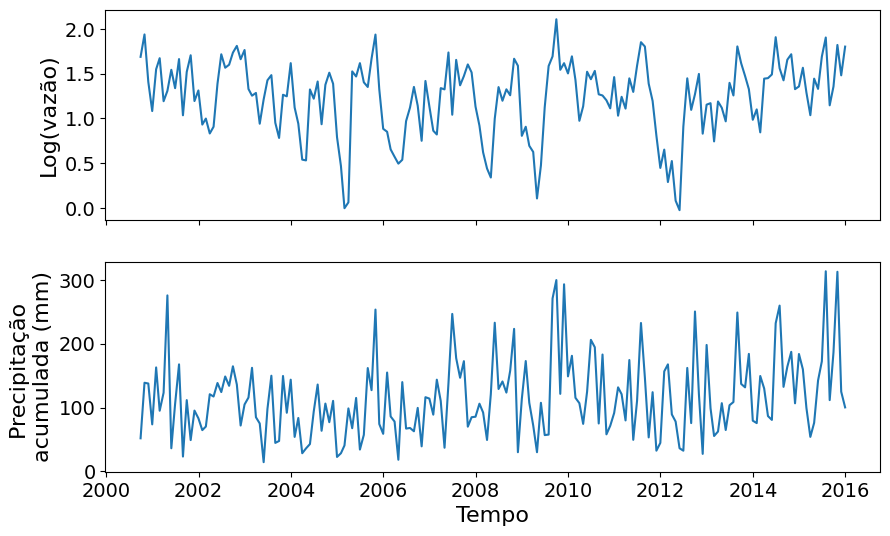

In [12]:
# Precipitação 
inmet = pd.read_excel(path+'\\Dados_INMet\\dados.xlsx')
inmet = inmet.set_index('index').resample('ME').sum()
media_mensal = media_mensal.loc[inmet.index.min():inmet.index.max()]

fig,ax = plt.subplots(2, sharex=True, figsize=(10, 6))
ax[0].plot(media_mensal['log(Vazão)'])
ax[0].set_ylabel('Log(vazão)', fontsize=16)

ax[1].plot(inmet['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'])
ax[1].set_ylabel('Precipitação \nacumulada (mm)', fontsize=16)

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.xlabel('Tempo', fontsize=16) 
plt.savefig(path+'\\precipitacao.png', bbox_inches='tight')

## Violin plot

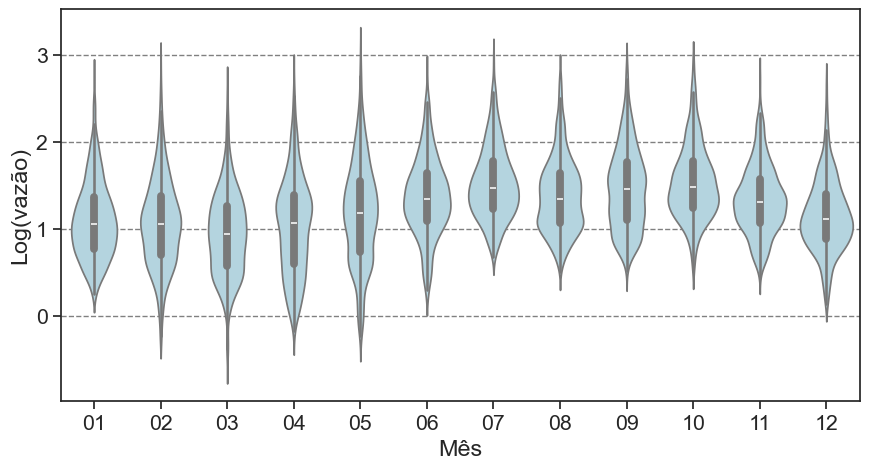

In [14]:
# Vazões climatológicas
mes = lambda x: x.strftime('%m')
fig, ax = plt.subplots(figsize=(9, 5))
ax = sns.violinplot(x=aux.index, 
                    y=aux['log(Vazão)'], 
                    formatter=mes,
                    color='lightblue')
ax.set_xlabel('Mês')
ax.set_ylabel('Log(vazão)')
sns.set_style('ticks', {'axes.grid': True,
                        'grid.color': 'gray',
                        'grid.linestyle': '--'})
sns.set_context('notebook', font_scale=1.4) 
fig.tight_layout() 
plt.savefig(path+'\\vazoes_climatologicas.png', bbox_inches='tight') 

## Histograma 
k = 1 + 3.33*log(n);   A = (máx-mín)/k <br>
- k = número de intervalos;
- n = número de elementos; 
- A = amplitude dos intervalos. 

In [12]:
n = len(aux['log(Vazão)'])
k = 1 + (3.33*np.log10(n)) 
A = (aux['log(Vazão)'].max()-aux['log(Vazão)'].min())/k
print('Max = ', aux['log(Vazão)'].max())
print('Mín = ', aux['log(Vazão)'].min())
print('k = ', k)
print('A = ', A)

Max =  3.032357098175008
Mín =  -0.5442417968958632
k =  14.715912775494159
A =  0.243042952865747


In [13]:
'''
fig, ax = plt.subplots() 
data = aux['log(Vazão)']
num_bins = 15
counts, bin_edges = np.histogram(data, bins=num_bins)

sns.histplot(data=aux, 
             x=aux['log(Vazão)'], 
             stat="percent",
             bins=bin_edges) 
plt.xticks([round(x,2) for x in bin_edges], 
           rotation=90)

plt.title('Histograma - Vazões diárias') 
plt.xlabel('log(vazão)') 
plt.ylabel('Frequência (%)') 
'''

'\nfig, ax = plt.subplots() \ndata = aux[\'log(Vazão)\']\nnum_bins = 15\ncounts, bin_edges = np.histogram(data, bins=num_bins)\n\nsns.histplot(data=aux, \n             x=aux[\'log(Vazão)\'], \n             stat="percent",\n             bins=bin_edges) \nplt.xticks([round(x,2) for x in bin_edges], \n           rotation=90)\n\nplt.title(\'Histograma - Vazões diárias\') \nplt.xlabel(\'log(vazão)\') \nplt.ylabel(\'Frequência (%)\') \n'